In [1]:
import os
import json

### Data Preprocess
Dataset contains two parts:
##### Repo_data:
    unique_name: author_repo
    {
        'reference': reference index (str)
        'abstract': abstract of the paper (str)
        'tasks': task given by paper with code (list of strs)
        ‘author’: author name
        'url': Github repo link
        'repo': repo name
    }

##### Final_dataset:
    json result from cleaning
    ...unique_name.folder.file.class.function:
        [min_line, max_line]: the line index of the function in file
        [all call info]: all call information
        'function'/'method': if in a class or not
        [inside call info]: call functions or methods in the repo

##### Data Info
The dataset contains 2021 repos, with 894 total classes in various perspectives

In [2]:
with open('D:\\Projects\\UPM\\RepoUnder\\data\\matching_data.json', 'r') as f:
    abs_data = json.load(f)
print(len(abs_data))

2021


In [3]:
abs_len = 0
for key, val in abs_data.items():
    abs_len += len(val['abstract'])
print(abs_len/2021)

1200.448787728847


In [5]:
tasks = {}
for key, val in abs_data.items():
    for task in val['task']:
        if task in tasks.keys():
            tasks[task] += 1
        else:
            tasks[task] = 1

print(tasks)

{'Constituency Grammar Induction': 1, 'Deep Clustering': 6, 'Metric Learning': 13, 'Depth Estimation': 22, 'Monocular Depth Estimation': 10, '2D Human Pose Estimation': 3, '3D Human Pose Estimation': 6, '3D Human Reconstruction': 1, '3D Human Shape Estimation': 2, '3D Multi-Person Mesh Recovery': 2, '3D Multi-Person Pose Estimation': 2, 'Monocular 3D Human Pose Estimation': 1, 'Pose Estimation': 28, 'Cross-Modal Retrieval': 4, 'Music Tagging': 1, 'TAG': 8, 'Word Embeddings': 25, 'Model Selection': 7, 'Multi Label Text Classification': 2, 'Multi-Label Text Classification': 3, 'Text Classification': 25, 'Response Generation': 9, 'Self-Supervised Learning': 35, 'Session-Based Recommendations': 4, 'Counterfactual Inference': 3, 'Multi-Task Learning': 23, 'Natural Language Processing': 51, 'Populist attitude': 1, 'Crime Prediction': 2, 'Entity Alignment': 7, 'Graph Sampling': 3, 'Knowledge Graphs': 27, 'Semantic Parsing': 10, 'Active Learning': 15, 'Grammatical Error Correction': 4, 'Transf

Define Threshold Value

In [6]:
imp_task = []
for task, val in tasks.items():
    if val >= 30:
        imp_task.append(task)
print(len(imp_task))
print(imp_task)

23
['Self-Supervised Learning', 'Natural Language Processing', 'Transfer Learning', 'Translation', 'Image Generation', 'Representation Learning', 'Classification', 'General Classification', 'Image Classification', 'Data Augmentation', 'Question Answering', 'Super-Resolution', 'reinforcement-learning', 'object-detection', 'Object Detection', 'Decision Making', 'Machine Translation', 'Semantic Segmentation', 'Few-Shot Learning', 'Domain Adaptation', 'Language Modelling', 'Meta-Learning', 'Contrastive Learning']


##### Data Visualization

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from random import choice
import numpy as np

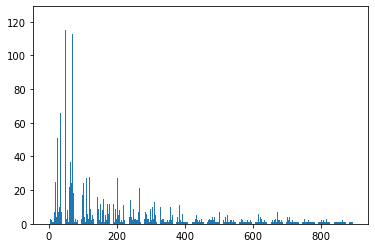

In [8]:
x = np.arange(894)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x, tasks.values())
plt.show()

In [11]:
file_list = os.listdir('D:\\Projects\\UPM\\RepoUnder\\data\\graph')
graph_template = choice(file_list)
print(graph_template)
graph_path = 'D:\\Projects\\UPM\\RepoUnder\\data\\graph\\' + graph_template
with open(graph_path, 'r') as gf:
    graph_data = json.load(gf)

jychoi118_toward_spatial_unbiased.json


In [12]:
print(graph_data)

{'home.repos.pwc.inspect_result.jychoi118_toward_spatial_unbiased.None.projector.noise_regularize': [[18, 39], ['noise.mean.reshape', 'noise.mean.mean', 'torch.roll', 'torch.roll'], 'function', ['None'], ['def', 'noise_regularize', '(', 'noises', ')', ':', '\n', '    ', 'loss', '=', '0', '\n', '\n', 'for', 'noise', 'in', 'noises', ':', '\n', '        ', 'size', '=', 'noise', '.', 'shape', '[', '2', ']', '\n', '\n', 'while', 'True', ':', '\n', '            ', 'loss', '=', '(', '\n', 'loss', '\n', '+', '(', 'noise', '*', 'torch', '.', 'roll', '(', 'noise', ',', 'shifts', '=', '1', ',', 'dims', '=', '3', ')', ')', '.', 'mean', '(', ')', '.', 'pow', '(', '2', ')', '\n', '+', '(', 'noise', '*', 'torch', '.', 'roll', '(', 'noise', ',', 'shifts', '=', '1', ',', 'dims', '=', '2', ')', ')', '.', 'mean', '(', ')', '.', 'pow', '(', '2', ')', '\n', ')', '\n', '\n', 'if', 'size', '<=', '8', ':', '\n', '                ', 'break', '\n', '\n', '', 'noise', '=', 'noise', '.', 'reshape', '(', '[', '-',

[('home.repos.pwc.inspect_result.jychoi118_toward_spatial_unbiased.None.non_leaking.AdaptiveAugment.tune', 2), ('home.repos.pwc.inspect_result.jychoi118_toward_spatial_unbiased.None.non_leaking.random_mat_apply', 3), ('home.repos.pwc.inspect_result.jychoi118_toward_spatial_unbiased.None.non_leaking.sample_affine', 9), ('home.repos.pwc.inspect_result.jychoi118_toward_spatial_unbiased.None.non_leaking.sample_color', 11), ('home.repos.pwc.inspect_result.jychoi118_toward_spatial_unbiased.None.non_leaking.try_sample_affine_and_pad', 3), ('home.repos.pwc.inspect_result.jychoi118_toward_spatial_unbiased.None.non_leaking.random_apply_affine', 6), ('home.repos.pwc.inspect_result.jychoi118_toward_spatial_unbiased.None.non_leaking.random_apply_color', 3), ('home.repos.pwc.inspect_result.jychoi118_toward_spatial_unbiased.None.non_leaking.augment', 3), ('home.repos.pwc.inspect_result.jychoi118_toward_spatial_unbiased.None.distributed.get_rank', 4), ('home.repos.pwc.inspect_result.jychoi118_toward_s

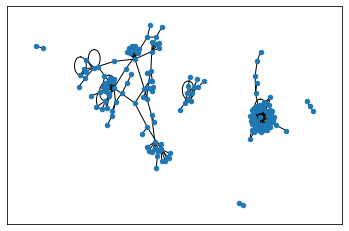

In [13]:
G = nx.Graph()
for gkey, gval in graph_data.items():
    if gval[3][0] != 'None':
        G.add_node(gkey)

for gkey, gval in graph_data.items():
    if gval[3][0] != 'None':
        for node in gval[3]:
            G.add_edge(gkey, node)
# print(labeldict)
d = nx.degree(G)
print(d)
nx.draw_networkx(G, with_labels=False, node_size = 20)
plt.show()

### Testing Sim Score
Dataset: score.csv
Columns: Graph_1, Graph_2, miniLM(Score), sbert(Score), tsdae(Score)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('D:\\Projects\\UPM\\RepoUnder\\data\\score.csv')
print(data.head(5))
print(len(data))

                graph_1                            graph_2  miniLM   sbert  \
0  sustcsonglin_TN-PCFG               aioz-ai_BMVC20_CBSwR  0.4038  0.6282   
1  sustcsonglin_TN-PCFG                 vinvino02_GLPDepth  0.4147  0.6573   
2  sustcsonglin_TN-PCFG      pixelite1201_agora_evaluation  0.2553  0.5664   
3  sustcsonglin_TN-PCFG  minzwon_tag-based-music-retrieval  0.4121  0.5965   
4  sustcsonglin_TN-PCFG               princeton-nlp_semsup  0.5024  0.6293   

    tsdae  
0  0.5294  
1  0.5728  
2  0.5218  
3  0.5402  
4  0.5432  
2041210


In [25]:
plot_data = data.sample(1000)

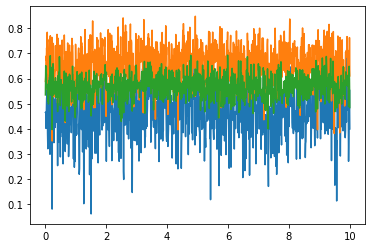

In [31]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, plot_data['miniLM'])
ax.plot(x, plot_data['sbert'])
ax.plot(x, plot_data['tsdae'])

(array([  2.,   3.,   1.,   3.,   6.,  13.,  29.,  27.,  40.,  78., 108.,
        123., 132., 121., 121.,  82.,  62.,  35.,  10.,   4.]),
 array([0.0611  , 0.094035, 0.12697 , 0.159905, 0.19284 , 0.225775,
        0.25871 , 0.291645, 0.32458 , 0.357515, 0.39045 , 0.423385,
        0.45632 , 0.489255, 0.52219 , 0.555125, 0.58806 , 0.620995,
        0.65393 , 0.686865, 0.7198  ]),
 <BarContainer object of 20 artists>)

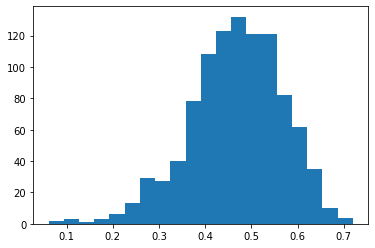

In [36]:
plt.hist(plot_data['miniLM'],bins = 20)

(array([  1.,   4.,   1.,   5.,   7.,  16.,  20.,  46.,  59.,  74.,  88.,
        116., 105., 117., 126.,  99.,  64.,  35.,  12.,   5.]),
 array([0.3513 , 0.37615, 0.401  , 0.42585, 0.4507 , 0.47555, 0.5004 ,
        0.52525, 0.5501 , 0.57495, 0.5998 , 0.62465, 0.6495 , 0.67435,
        0.6992 , 0.72405, 0.7489 , 0.77375, 0.7986 , 0.82345, 0.8483 ]),
 <BarContainer object of 20 artists>)

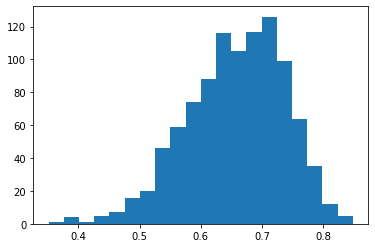

In [37]:
plt.hist(plot_data['sbert'],bins = 20)

(array([  2.,   0.,   2.,   5.,  12.,  16.,  30.,  53.,  70.,  86., 136.,
        143., 122., 111.,  85.,  56.,  31.,  21.,  11.,   8.]),
 array([0.3969 , 0.41173, 0.42656, 0.44139, 0.45622, 0.47105, 0.48588,
        0.50071, 0.51554, 0.53037, 0.5452 , 0.56003, 0.57486, 0.58969,
        0.60452, 0.61935, 0.63418, 0.64901, 0.66384, 0.67867, 0.6935 ]),
 <BarContainer object of 20 artists>)

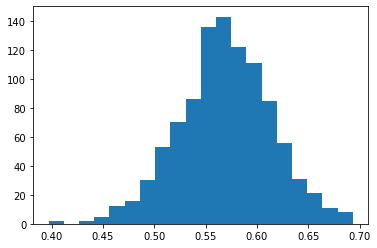

In [38]:
plt.hist(plot_data['tsdae'],bins = 20)

### Test Distribution

In [42]:
import scipy.stats as sta

In [45]:
def kl(p, q):
    return sta.entropy(p, q, base=2)

In [52]:
print(kl(plot_data['sbert'],plot_data['miniLM']))
print(kl(plot_data['miniLM'],plot_data['sbert']))
print(kl(plot_data['sbert'],plot_data['tsdae']))
print(kl(plot_data['tsdae'],plot_data['sbert']))
print(kl(plot_data['miniLM'],plot_data['tsdae']))
print(kl(plot_data['tsdae'],plot_data['miniLM']))

0.029637841324845034
0.026874094554518103
0.009127581010191338
0.009339798143358934
0.02687152704312897
0.030053395269814015


In [53]:
def js(p,q):
    M=(p+q)/2
    return 0.5*sta.entropy(p, M)+0.5*sta.entropy(q, M)

In [54]:
print(js(plot_data['sbert'],plot_data['miniLM']))
print(js(plot_data['miniLM'],plot_data['sbert']))
print(js(plot_data['sbert'],plot_data['tsdae']))
print(js(plot_data['tsdae'],plot_data['sbert']))
print(js(plot_data['miniLM'],plot_data['tsdae']))
print(js(plot_data['tsdae'],plot_data['miniLM']))

0.004952768463449931
0.004952768463449931
0.0016051303224158657
0.0016051303224158657
0.004899526758288944
0.004899526758288944
